![logo](https://s3.eu-central-1.amazonaws.com/camo-bucket/logo_small.svg)

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import numpy as np
import io
import os
import urllib.request

In [2]:
from supersight import Dashboard, Plots_gatherer

# 1. Create a collection of plots
The main goal of supersight is to gather your plots and organize these plots with a mini web site.
Actually, you can embed any svg plots but this tool was designed to work with MatPlotlib.  

We start by creating a plots gatherer object.  
It will contain our plots for easy retrieval:

In [3]:
plots = Plots_gatherer()

Let's generate a simple plot :

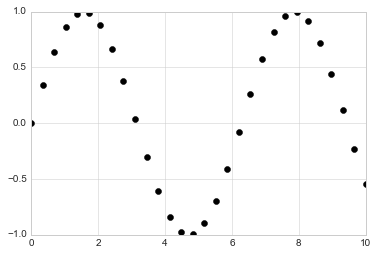

In [4]:
graph = plt.figure()
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

buf = io.BytesIO()
plt.savefig(buf, format='svg')
plots.add_plot("first graph", buf)

Once your are happy with it, supersight requires you to save your plot in  BytesIO objects.  
SVG format is advised since it is lightweight and vector-based.  
The three last lines are required to save your plot in a way supersight can handle.

We will make a new plot :

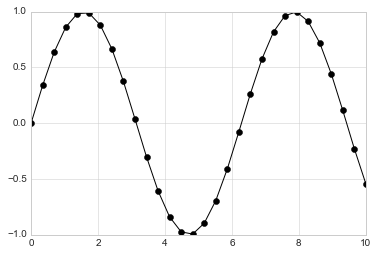

In [5]:
graph = plt.figure()
plt.plot(x, y, '-ok')
buf = io.BytesIO()
plt.savefig(buf, format='svg')
plots.add_plot("second graph", buf)

And a third graph for the example :

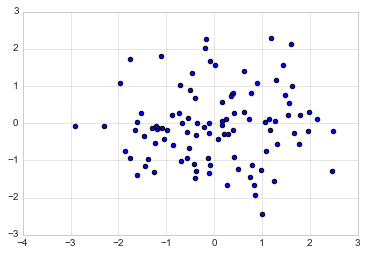

In [6]:
graph = plt.figure()
plt.scatter(np.random.randn(100), np.random.randn(100));
buf = io.BytesIO()
plt.savefig(buf, format='svg')
#plt.close()
plots.add_plot("third graph", buf)

Below is a hack to load external svg in our mini site :

In [7]:
logo = open("logo_small.svg", "rb")
logo_buf = io.BytesIO(logo.read())
plots.add_plot("logo", logo_buf)
logo.close()

# 2. Create a dashboard
Once your plots are saved in BytesIO objects you can start making a dashboard by initiating a Dashboard object :  


In [8]:
ds = Dashboard()

By default, the mini site comes with a home page. We will add two sections. The first section will contain only one page and the second will contain two pages.  
**As a convention a single-page section is composed of a page named "Page 1".**

In [9]:
ds.add_section("Section 1")
# We just created a section named Section 1. Pick a custom name that describe an underlying idea of your plots.
ds.sections["Section 1"].add_page("Page 1")


ds.add_section("Section 2")
# We just created a section named Section 2. We said we wanted two pages in this section :
ds.sections["Section 2"].add_page("Page 1")
ds.sections["Section 2"].add_page("Great Page") # name it as you want !

Each page is organised following a classic Bootstrap grid. Users can display elements on this grid. The default grid is `[(6, 6), (6, 6), (6, 6)]`. It means the page displays three rows with two elements on each row.  
Of course, this layout can be overridden. For the Home page we will display the supersight logo.  
According to the Bootstrap grid system the layout for a single row and a single element is `[(12,)]`.

In [10]:
ds.sections["Home"].pages["Home"].layout = [(12,)]

In [11]:
ds.sections["Home"].pages["Home"].add_element(name = "logo", plot_object = plots.get_plot("logo"))


In section 1, the default grid can stay (hence six plots). Users can populate the grid with their plots. This process populate the grid from left to right and from top to bottom :

In [12]:
ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 1", plot_object = plots.get_plot("first graph"))
ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 2", plot_object = plots.get_plot("first graph"))

ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 3", plot_object = plots.get_plot("second graph"))
ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 4", plot_object = plots.get_plot("second graph"))

ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 5", plot_object = plots.get_plot("third graph"))
ds.sections["Section 1"].pages["Page 1"].add_element(name = "plot 6", plot_object = plots.get_plot("third graph"))
# add comments :
ds.sections["Section 1"].pages["Page 1"].elements["plot 3"].add_comment_below("This plot will convince you !")

Users can also use MathJax to dsiplay equations in comments :

In [13]:
ds.sections["Section 1"].pages["Page 1"].elements["plot 6"].add_comment_below("""This one is not bad either ! <br>
You can also use MathJax : $x = {-b \pm \sqrt{b^2-4ac} \over 2a}.$""")

Now we can try to vary the layout. For instance on the first row we will display a plot two third the width.  
On the second row we can display a unique plot with a heading.  
And then three small plots on the last row.

In [14]:
ds.sections["Section 2"].pages["Page 1"].layout = [(8, 4), (12,), (4, 4, 4)]

ds.sections["Section 2"].pages["Page 1"].add_element(name = "plot 1", plot_object = plots.get_plot("third graph"), heading = None)
ds.sections["Section 2"].pages["Page 1"].add_element(name = "plot 2", plot_object = plots.get_plot("first graph"), heading = None)

ds.sections["Section 2"].pages["Page 1"].add_element(name = "plot 3", plot_object = plots.get_plot("second graph"), heading = "Interesting Heading")

ds.sections["Section 2"].pages["Page 1"].add_element(name = "plot 4", plot_object = plots.get_plot("third graph"), heading = None)
ds.sections["Section 2"].pages["Page 1"].add_element(name = "plot 5", plot_object = plots.get_plot("third graph"), heading = None)
ds.sections["Section 2"].pages["Page 1"].add_element(name = "plot 6", plot_object = plots.get_plot("third graph"), heading = None)

To finish, we can display text on the "great page" !

In [15]:
ds.render()

bootstrap-grid.css
bootstrap-grid.css.map
bootstrap-grid.min.css
bootstrap-grid.min.css.map
bootstrap-reboot.css
bootstrap-reboot.css.map
bootstrap-reboot.min.css
bootstrap-reboot.min.css.map
bootstrap.css
bootstrap.css.map
bootstrap.min.css
bootstrap.min.css.map
jumbotron.css
.DS_Store
bootstrap.js
bootstrap.min.js
Home Home logo
Starting individual page : Section 1 Page 1
Section 1 Page 1 plot 1
Section 1 Page 1 plot 2
Section 1 Page 1 plot 3
Section 1 Page 1 plot 4
Section 1 Page 1 plot 5
Section 1 Page 1 plot 6
Starting individual page : Section 2 Page 1
Section 2 Page 1 plot 1
Section 2 Page 1 plot 2
Section 2 Page 1 plot 3
Section 2 Page 1 plot 4
Section 2 Page 1 plot 5
Section 2 Page 1 plot 6
Starting individual page : Section 2 Great Page


In [16]:
ds.nav_bar_section_page

[['Home'], ['Page 1'], ['Page 1', 'Great Page']]

In [17]:
[len(x) for x in ds.nav_bar_section_page]

[1, 1, 2]

In [18]:
ds.nav_bar_section

AttributeError: 'Dashboard' object has no attribute 'nav_bar_section'